# Titanic Dataset - Exploratory Data Analysis (EDA)

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Purpose: Import essential libraries for data manipulation (Pandas, NumPy) and visualization (Matplotlib, Seaborn).

### Load the combined Titanic dataset

In [2]:
file_path = 'titanic_combined.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Purpose: Load the Titanic dataset from a CSV file and display the first few rows to understand the structure of the data.

## Basic Data Exploration

#### *1. Data summary*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


Purpose: Provides an overview of the dataset, including column names, data types, and non-null counts.

#### *2. Statistical summary*

In [4]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Purpose: Generates summary statistics for numerical columns, such as mean, median, and standard deviation.

#### *3. Checking for missing values*

In [5]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Purpose: Identifies missing values in each column to determine if data cleaning is required.

### **1. Histplot for Distribution of Age with counts**

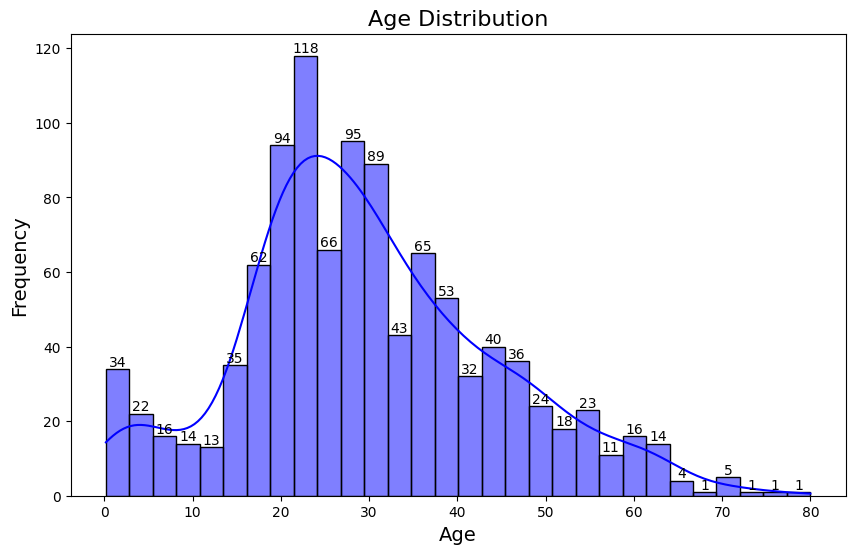

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['Age'], kde=True, bins=30, color='blue')

# Annotate the bars with counts
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with non-zero height
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=10)

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

A histogram is used to visualize the distribution of a single variable. It divides the data into bins and shows the frequency of data points in each bin.

**Histogram for Age Distribution
Observation:** The histogram shows the distribution of passenger ages. The majority of passengers are between 20 and 40 years old. There are fewer passengers in the younger (below 10) and older (above 60) age groups.

**Insight:** The dataset is skewed towards younger passengers, with a peak in the 20–30 age range.

### **2. Countplot for Survived Counts**

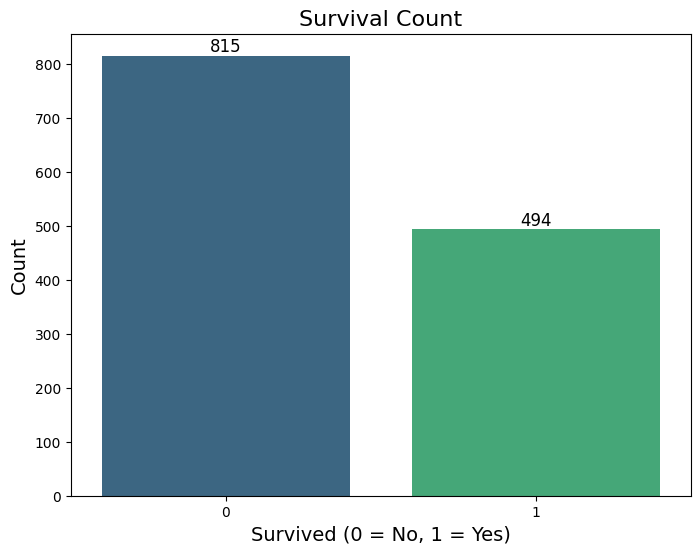

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=data, hue='Survived', palette='viridis', legend=False)

# Annotate the bars with counts
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2, count),
                ha='center', va='bottom', fontsize=12)

plt.title('Survival Count', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Displays the number of survivors (Survived = 1) and non-survivors (Survived = 0).

**Survived Counts
Observation:** The countplot shows the number of passengers who survived (Survived = 1) and those who didn’t (Survived = 0).
The number of non-survivors is significantly higher than the number of survivors.

**Insight:** The survival rate is low, indicating that most passengers did not survive the Titanic disaster.

### **3. Boxplot for Age vs. Survived**

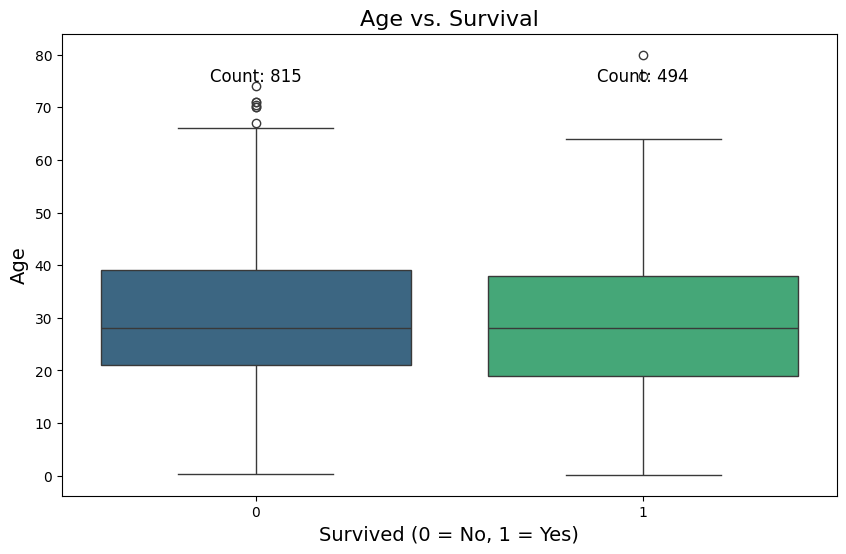

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Survived', y='Age', data=data, hue='Survived', palette='viridis', dodge=False, legend=False)

# Add counts above each box
survival_counts = data['Survived'].value_counts()
for i, count in enumerate(survival_counts):
    ax.annotate(f'Count: {count}', (i, data['Age'].max() - 5), ha='center', fontsize=12)

plt.title('Age vs. Survival', fontsize=16)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()


A boxplot is used to visualize the distribution of a variable and identify outliers. It shows the median, quartiles, and potential outliers.

**Boxplot for Age vs. Survival
Observation:** The boxplot shows that the median age of survivors is slightly lower than that of non-survivors. There are more outliers in the older age group for non-survivors.

**Insight:** Younger passengers had a higher likelihood of survival compared to older passengers.

### **4. Scatterplot for Age vs. Fare**

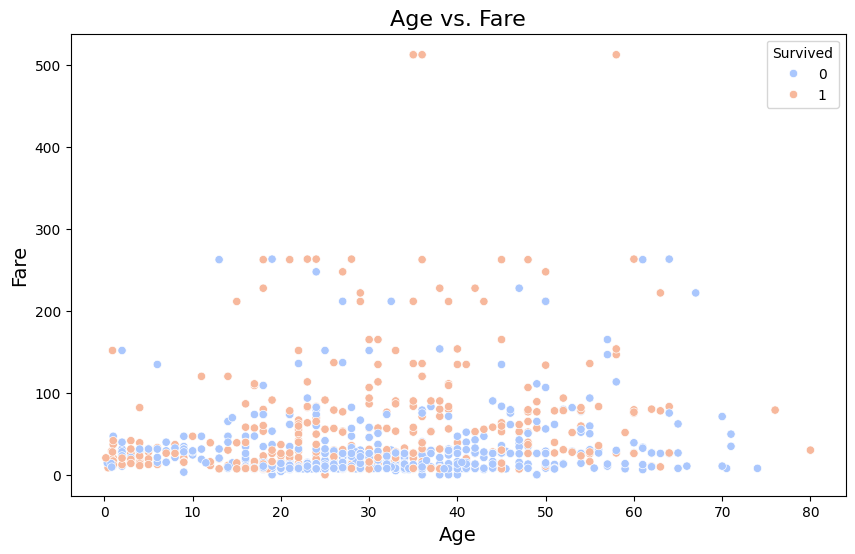

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived', palette='coolwarm')
plt.title('Age vs. Fare', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare', fontsize=14)
plt.legend(title='Survived', loc='upper right')
plt.show()

A scatterplot is used to visualize the relationship between two continuous variables.

**Scatterplot for Age vs. Fare
Observation:** The scatterplot shows that passengers who paid higher fares were generally younger. There is a cluster of passengers who paid low fares across all age groups.

**Insight:** Higher fares might be associated with better survival chances, as younger passengers paying higher fares are more likely to survive.

### **5. Heatmap of Correlations**

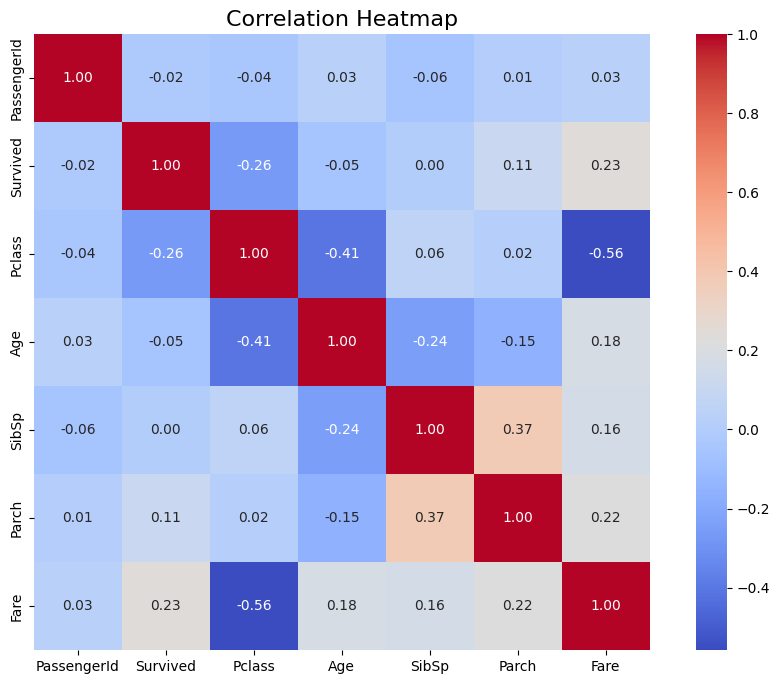

In [10]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


A heatmap was generated to show correlations between numeric variables.

**Observation:** The heatmap shows the correlation between numeric variables in the dataset.
Fare has a moderate positive correlation with Pclass (indicating higher-class passengers paid higher fares).
Survived has a weak positive correlation with Fare and a weak negative correlation with Pclass.
Other correlations are relatively weak.

**Insight:** Passengers in higher classes (lower Pclass values) and those who paid higher fares were more likely to survive.


### **6. Pairplot of the dataset**

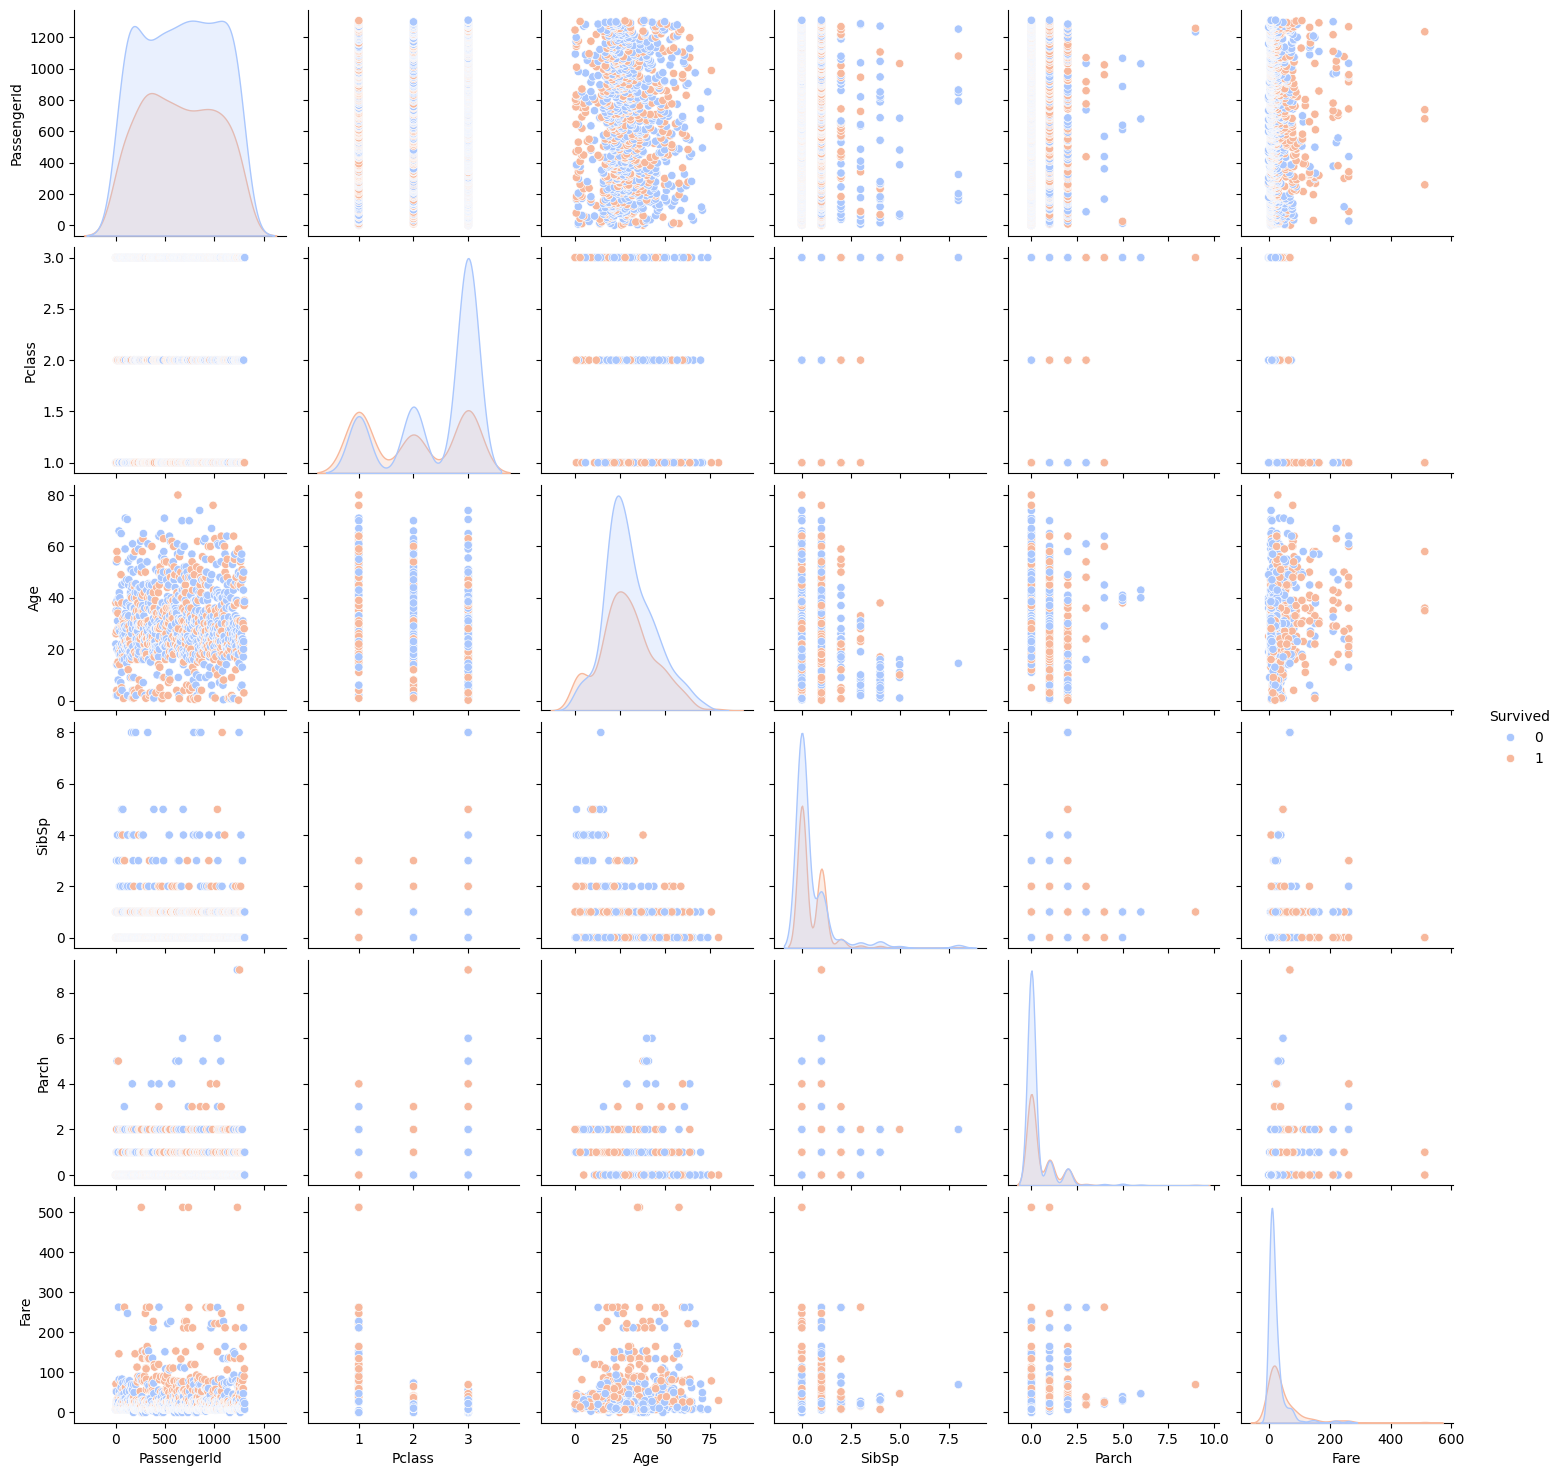

In [11]:
sns.pairplot(data, hue='Survived', palette='coolwarm')
plt.show()

A pairplot is used to visualize pairwise relationships between numerical variables in the dataset. The hue='Survived' parameter highlights the survival status (0 = No, 1 = Yes) using different colors.

**Observation:**
The pairplot shows how variables like Age, Fare, and Pclass interact with each other. Passengers who paid higher fares (Fare) and belonged to higher classes (Pclass) were more likely to survive. Younger passengers also show a higher survival rate.

**Insight:**
The pairplot provides a comprehensive view of the relationships between variables and their impact on survival. It confirms that Fare and Pclass are significant factors influencing survival.

**Summary of Findings**

1. **Age Distribution:**
Most passengers were young adults (20–40 years old), with fewer children and elderly passengers. The dataset is skewed towards younger passengers, with a peak in the 20–30 age range.

2. **Survival Counts:** The majority of passengers did not survive the Titanic disaster. Non-survivors significantly outnumber survivors, indicating a low survival rate.

3. **Age vs. Survival:** Younger passengers had a higher likelihood of survival compared to older passengers. The median age of survivors is slightly lower than that of non-survivors, with more outliers in the older age group for non-survivors.

- **Fare vs. Age:** Passengers who paid higher fares were generally younger. There is a cluster of passengers who paid low fares across all age groups. Higher fares might be associated with better survival chances.

- **General Insight:** Age and fare appear to be significant factors influencing survival, with younger passengers and those paying higher fares having better outcomes.

- **Correlation Analysis:**
    - Fare has a moderate positive correlation with Pclass (indicating higher-class passengers paid higher fares).
    - Survived has a weak positive correlation with Fare and a weak negative correlation with Pclass.
    - Other correlations are relatively weak, suggesting additional factors influenced survival.


Survival was likely influenced by factors such as class, age, and fare.